Sum of Square Errors =  0.003089469292689246
Slope value (m1) = 
 [6.05866078]
y-axis interceptor value (c) =  [-9.14798368]
Original output (Y) =  [0 0 0 1]
logistic regression outputs (y) =  [1.06459059e-04 4.35545382e-02 4.35545382e-02 9.51164238e-01]


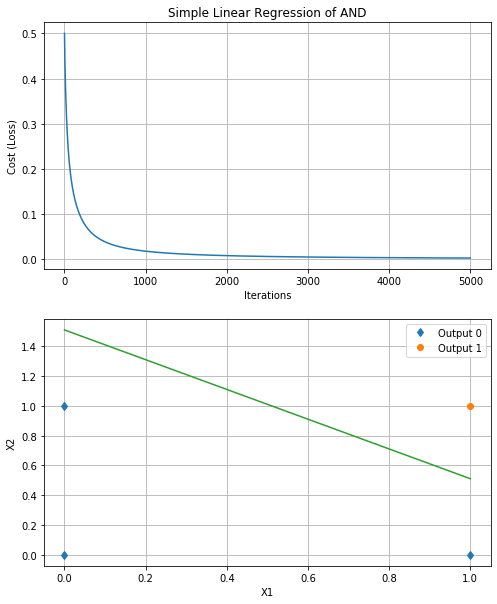

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([[0, 0, 1, 1]])

X2 = np.array([[0, 1, 0, 1]])

Y  = np.array([[0, 0, 0, 1]])

dataset_len = Y.size
nety  = np.zeros((1, dataset_len))
y     = np.zeros((1, dataset_len)) 
m     = np.zeros((1, 1))
c     = np.zeros((1, 1))
se    = np.zeros((1, dataset_len))
de    = np.zeros((1, dataset_len))
epoch = 5000
n     = 1 # learning rate
it   = []
cost = []

def sig(y):
    return 1/(1+np.exp(-y))

def dsig(y):
    return y * (1-y)

def feed_forward():
    global X1, X2, nety, y, m, c, se, de
    nety = m * (X1+X2) + c
    y    = sig(nety)
    se   = 0.5 * (y - Y)**2
    cost.append(np.sum(se)/len(se))
    de   = (y - Y)
    return 0

def backpropagation():
    global X1, X2, y, m, c, de, n

    #backpropagation
    #gradient descent calculation
    gradm = np.zeros((1, 1))
    gradm = np.sum(de * y*(1-y) * (X1+X2)) / dataset_len

    gradc = np.zeros((1, 1))
    gradc = np.sum(de * y*(1-y)) / dataset_len

    #update m1, m2 (slopes) & c (y-axis intercept)
    m -= n * gradm
    c -= n * gradc


def main():
    for i in range(epoch):
        feed_forward()
        it.append(i)
        backpropagation()

main()

print('Sum of Square Errors = ', np.sum(se)/len(se))
print('Slope value (m1) = \n', *m)
print('y-axis interceptor value (c) = ', *c)
print('Original output (Y) = ', *Y)
print('logistic regression outputs (y) = ', *y)

#graph plot
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 10)

plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(it, cost)
plt.grid(True)
plt.title('Simple Linear Regression of AND')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')

plt.subplot(2, 1, 2)
grp0x  = X1[Y == 0]
grp0y  = X2[Y == 0]
plt.plot(grp0x, grp0y, 'd')

grp1x = X1[Y == 1]
grp1y = X2[Y == 1]
plt.plot(grp1x, grp1y, 'o')
plt.legend(["Output 0", "Output 1"])

tmpx = X1.reshape(dataset_len)
tmpy = (-(m * tmpx + c)/ m).reshape(dataset_len)
plt.plot(tmpx, tmpy)
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()